In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray
%matplotlib inline

# Load GWCFD data

## Load the veritical profiles

In [2]:
D    = 21.0
x    = '1'
span_shift = 2.5*D

In [3]:
ablType = 'neutral'
simNomenclature = '5b'
fileToRead = '../../post_pro/turbine_'+ ablType+ simNomenclature+ '/lines/horLine_'+x+'D_U.xy'
print ("Reading file: %s"%fileToRead)
vertLine = pd.read_csv(fileToRead,
                    sep='\s+', skiprows=0, names=['span', 'U', 'V', 'W'])
#print (vertLine)

Reading file: ../../post_pro/turbine_neutral5b/lines/horLine_1D_U.xy


In [4]:
### The coordinates

In [5]:
nx   = 1
nz   = 2
ny   = len(vertLine)
nt   = 1

In [6]:
x_1d = np.zeros((nx)) + float(x)*D
z_1d = [32.1, 32.2]
y_1d = vertLine['span'] - span_shift
t_1d = [2000]
print (x_1d)
#print (y_1d)
print (z_1d)
print (t_1d)
Ux =  vertLine['V'] # Note that axial direction is along +y
Uy = -vertLine['U'] # spanwise is along -x
Uz =  vertLine['W']
#print (Ux)
#print (Uy)
#print (Uz)

[21.]
[32.1, 32.2]
[2000]


In [7]:
U = np.zeros((nt,nx,nz,ny))
V = np.zeros((nt,nx,nz,ny))
W = np.zeros((nt,nx,nz,ny))

In [8]:
#print (U[0][0][0])
#print (U[0][0][1][1:5])
#U[0][0][0:nz]= Ux

In [9]:
U[0][0][0:nz] = Ux
V[0][0][0:nz] = Uy
W[0][0][0:nz] = Uz
#print (U[0][0][0])
print (U[0][0][0][0:5])
#print (V[0][0][0])
print (V[0][0][0][0:5])
#print (W[0][0][0])
print (W[0][0][0][0:5])

[8.76147901 8.76208661 8.7626942  8.7633018  8.76390939]
[-0.07946921 -0.07878929 -0.07810938 -0.07742946 -0.07674955]
[0.00570845 0.00564577 0.00558308 0.0055204  0.00545772]


In [10]:
print("Shape of U is {0}".format(U.shape))
print("Shape of V is {0}".format(V.shape))
print("Shape of W is {0}".format(W.shape))

Shape of U is (1, 1, 2, 150)
Shape of V is (1, 1, 2, 150)
Shape of W is (1, 1, 2, 150)


# Use xarray to create DataArrays, then Dataset

### The velocities

In [11]:
U = xarray.DataArray(data=U, 
                     dims=("t","x","z","y"), 
                     coords={"t":t_1d,"x":x_1d,"z":z_1d,"y":y_1d}, 
                     name="U",
                     attrs={"long_name":"streamwise wind component","units":"m/s"})

In [12]:
V = xarray.DataArray(data=V, 
                     dims=("t","x","z","y"), 
                     coords={"t":t_1d,"x":x_1d,"z":z_1d,"y":y_1d}, 
                     name="V",
                     attrs={"long_name":"cross-stream wind component","units":"m/s"})

In [13]:
W = xarray.DataArray(data=W, 
                     dims=("t","x","z","y"), 
                     coords={"t":t_1d,"x":x_1d,"z":z_1d,"y":y_1d}, 
                     name="W",
                     attrs={"long_name":"vertical wind component","units":"m/s"})

In [14]:
dataset = xarray.Dataset(data_vars={"U":U,"V":V,"W":W})

In [15]:
print(dataset)

<xarray.Dataset>
Dimensions:  (t: 1, x: 1, y: 150, z: 2)
Coordinates:
  * t        (t) int64 2000
  * x        (x) float64 21.0
  * z        (z) float64 32.1 32.2
  * y        (y) float64 -52.5 -51.59 -50.69 -49.78 ... 79.78 80.69 81.59 82.5
Data variables:
    U        (t, x, z, y) float64 8.761 8.762 8.763 8.763 ... 8.769 8.768 8.768
    V        (t, x, z, y) float64 -0.07947 -0.07879 -0.07811 ... -0.1499 -0.1496
    W        (t, x, z, y) float64 0.005708 0.005646 ... 0.004278 0.004224


# See what it looks like

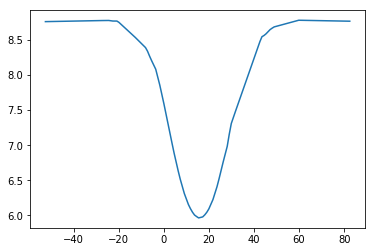

In [16]:
plt.plot(y_1d, U.loc[t_1d[0],x_1d[0],z_1d[0],:])

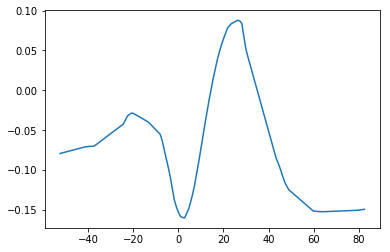

In [17]:
plt.plot(y_1d, V.loc[t_1d[0],x_1d[0],z_1d[0],:])

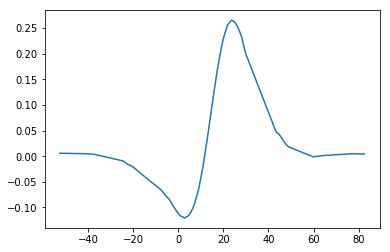

In [18]:
plt.plot(y_1d, W.loc[t_1d[0],x_1d[0],z_1d[0],:])

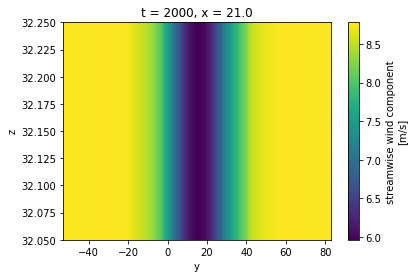

In [19]:
xarray.plot.pcolormesh(U.loc[t_1d[0],x_1d[0],:,:])

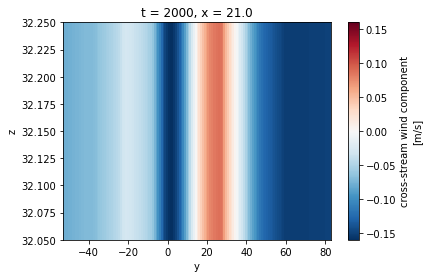

In [20]:
xarray.plot.pcolormesh(V.loc[t_1d[0],x_1d[0],:,:])

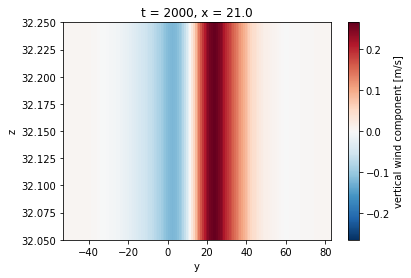

In [21]:
xarray.plot.pcolormesh(W.loc[t_1d[0],x_1d[0],:,:])

# Save as NetCDF

In [22]:
netcdf_path = os.path.join('../files_submitted','Phase2',ablType,'horLine')
if not os.path.exists(netcdf_path):
        os.makedirs(netcdf_path)
dataset.to_netcdf(path=os.path.join(netcdf_path,'ENVISION_OXLEY_RANS_20190304_uvw_'+x+'D.nc'),mode='w')